In [77]:
# Load libraries
import pandas as pd 
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### Summarized few things during process 

use 10 fold cross validation in our analysis with
each of the selected algorithms. That is, each dataset was divided into ten parts out of which nine
parts were used as training set and the remaining part is used as testing set. Repeating these ten
folds ensures that each part is used for training and testing thus minimizing the sample bias. 

 Total Bilirubin, Direct Bilirubin, Total Proteins and Albumin are crucial in deciding
liver status. . 
With the selected dataset, KNN, Back propagation and SVM are giving better
results with all the feature set combinations. 

In [ ]:
classifying liver
patients dataset.

In [78]:
data =pd.read_csv('train.csv')
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1


## Statistical Summary

In [5]:
data.shape
# our data have 466 rows and 11 columns where 11th column is response  , others are features(help us to predict response)

(466, 11)

In [79]:
print(data.describe())

              Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  466.000000       466.000000        466.000000            466.000000   
mean    45.321888         3.406438          1.503004            294.877682   
std     15.697936         6.510448          2.823700            252.718859   
min      4.000000         0.400000          0.100000             63.000000   
25%     33.000000         0.800000          0.200000            176.000000   
50%     46.000000         1.000000          0.300000            210.000000   
75%     58.000000         2.575000          1.300000            298.000000   
max     85.000000        75.000000         19.700000           2110.000000   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count                466.000000                  466.000000      466.000000   
mean                  82.633047                  114.982833        6.491845   
std                  192.801900                  312.869109 

In [56]:
# the dataset value : Y  i.e response
#checking no of values belong to each Dataset(y)
print(data.groupby('Dataset').size())
#Therfore: there are 2 datasets with 1st having greater number 

Dataset
1    333
2    133
dtype: int64


# Clean data

In [35]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    3
Dataset                       0
dtype: int64

In [80]:
data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].median(), inplace=True)
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [ ]:
#only  Albumin_and_Globulin_Ratio   have 3 null values

### Data Visualization

In [ ]:
Analysing each Feature

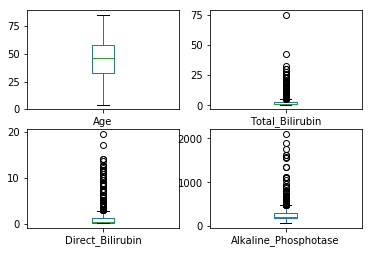

In [73]:
# box and whisker plots
cols=['Age','Total_Bilirubin', 'Direct_Bilirubin','Alkaline_Phosphotase']
data[cols].plot(kind='box',subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()


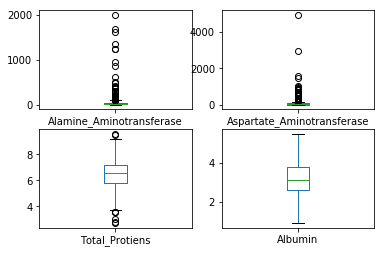

In [74]:
cola=['Alamine_Aminotransferase',  'Aspartate_Aminotransferase',  'Total_Protiens','Albumin']
data[cola].plot(kind='box',subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()


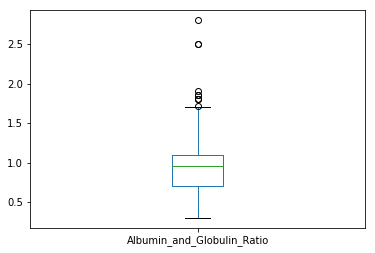

In [75]:
data['Albumin_and_Globulin_Ratio'].plot(kind='box',subplots=True)
plt.show()

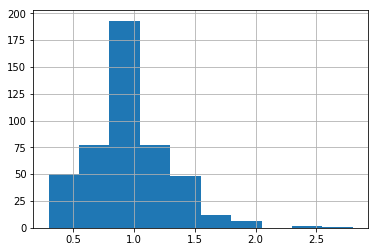

In [76]:
data['Albumin_and_Globulin_Ratio'].hist()
plt.show()

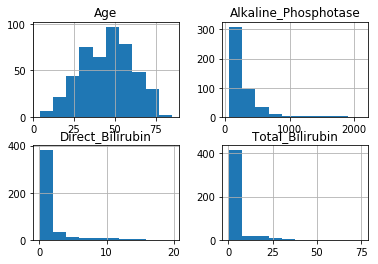

In [77]:
# histograms
data[cols].hist()
plt.show()



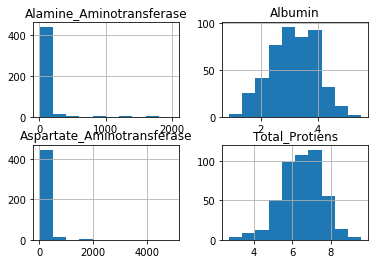

In [44]:
# histograms
data[cola].hist()
plt.show()

In [ ]:
#age, Albumin_and_Globulin_Ratio,Albumin,Total_protiens  have Guassian distribution

## Relationship between each attributes

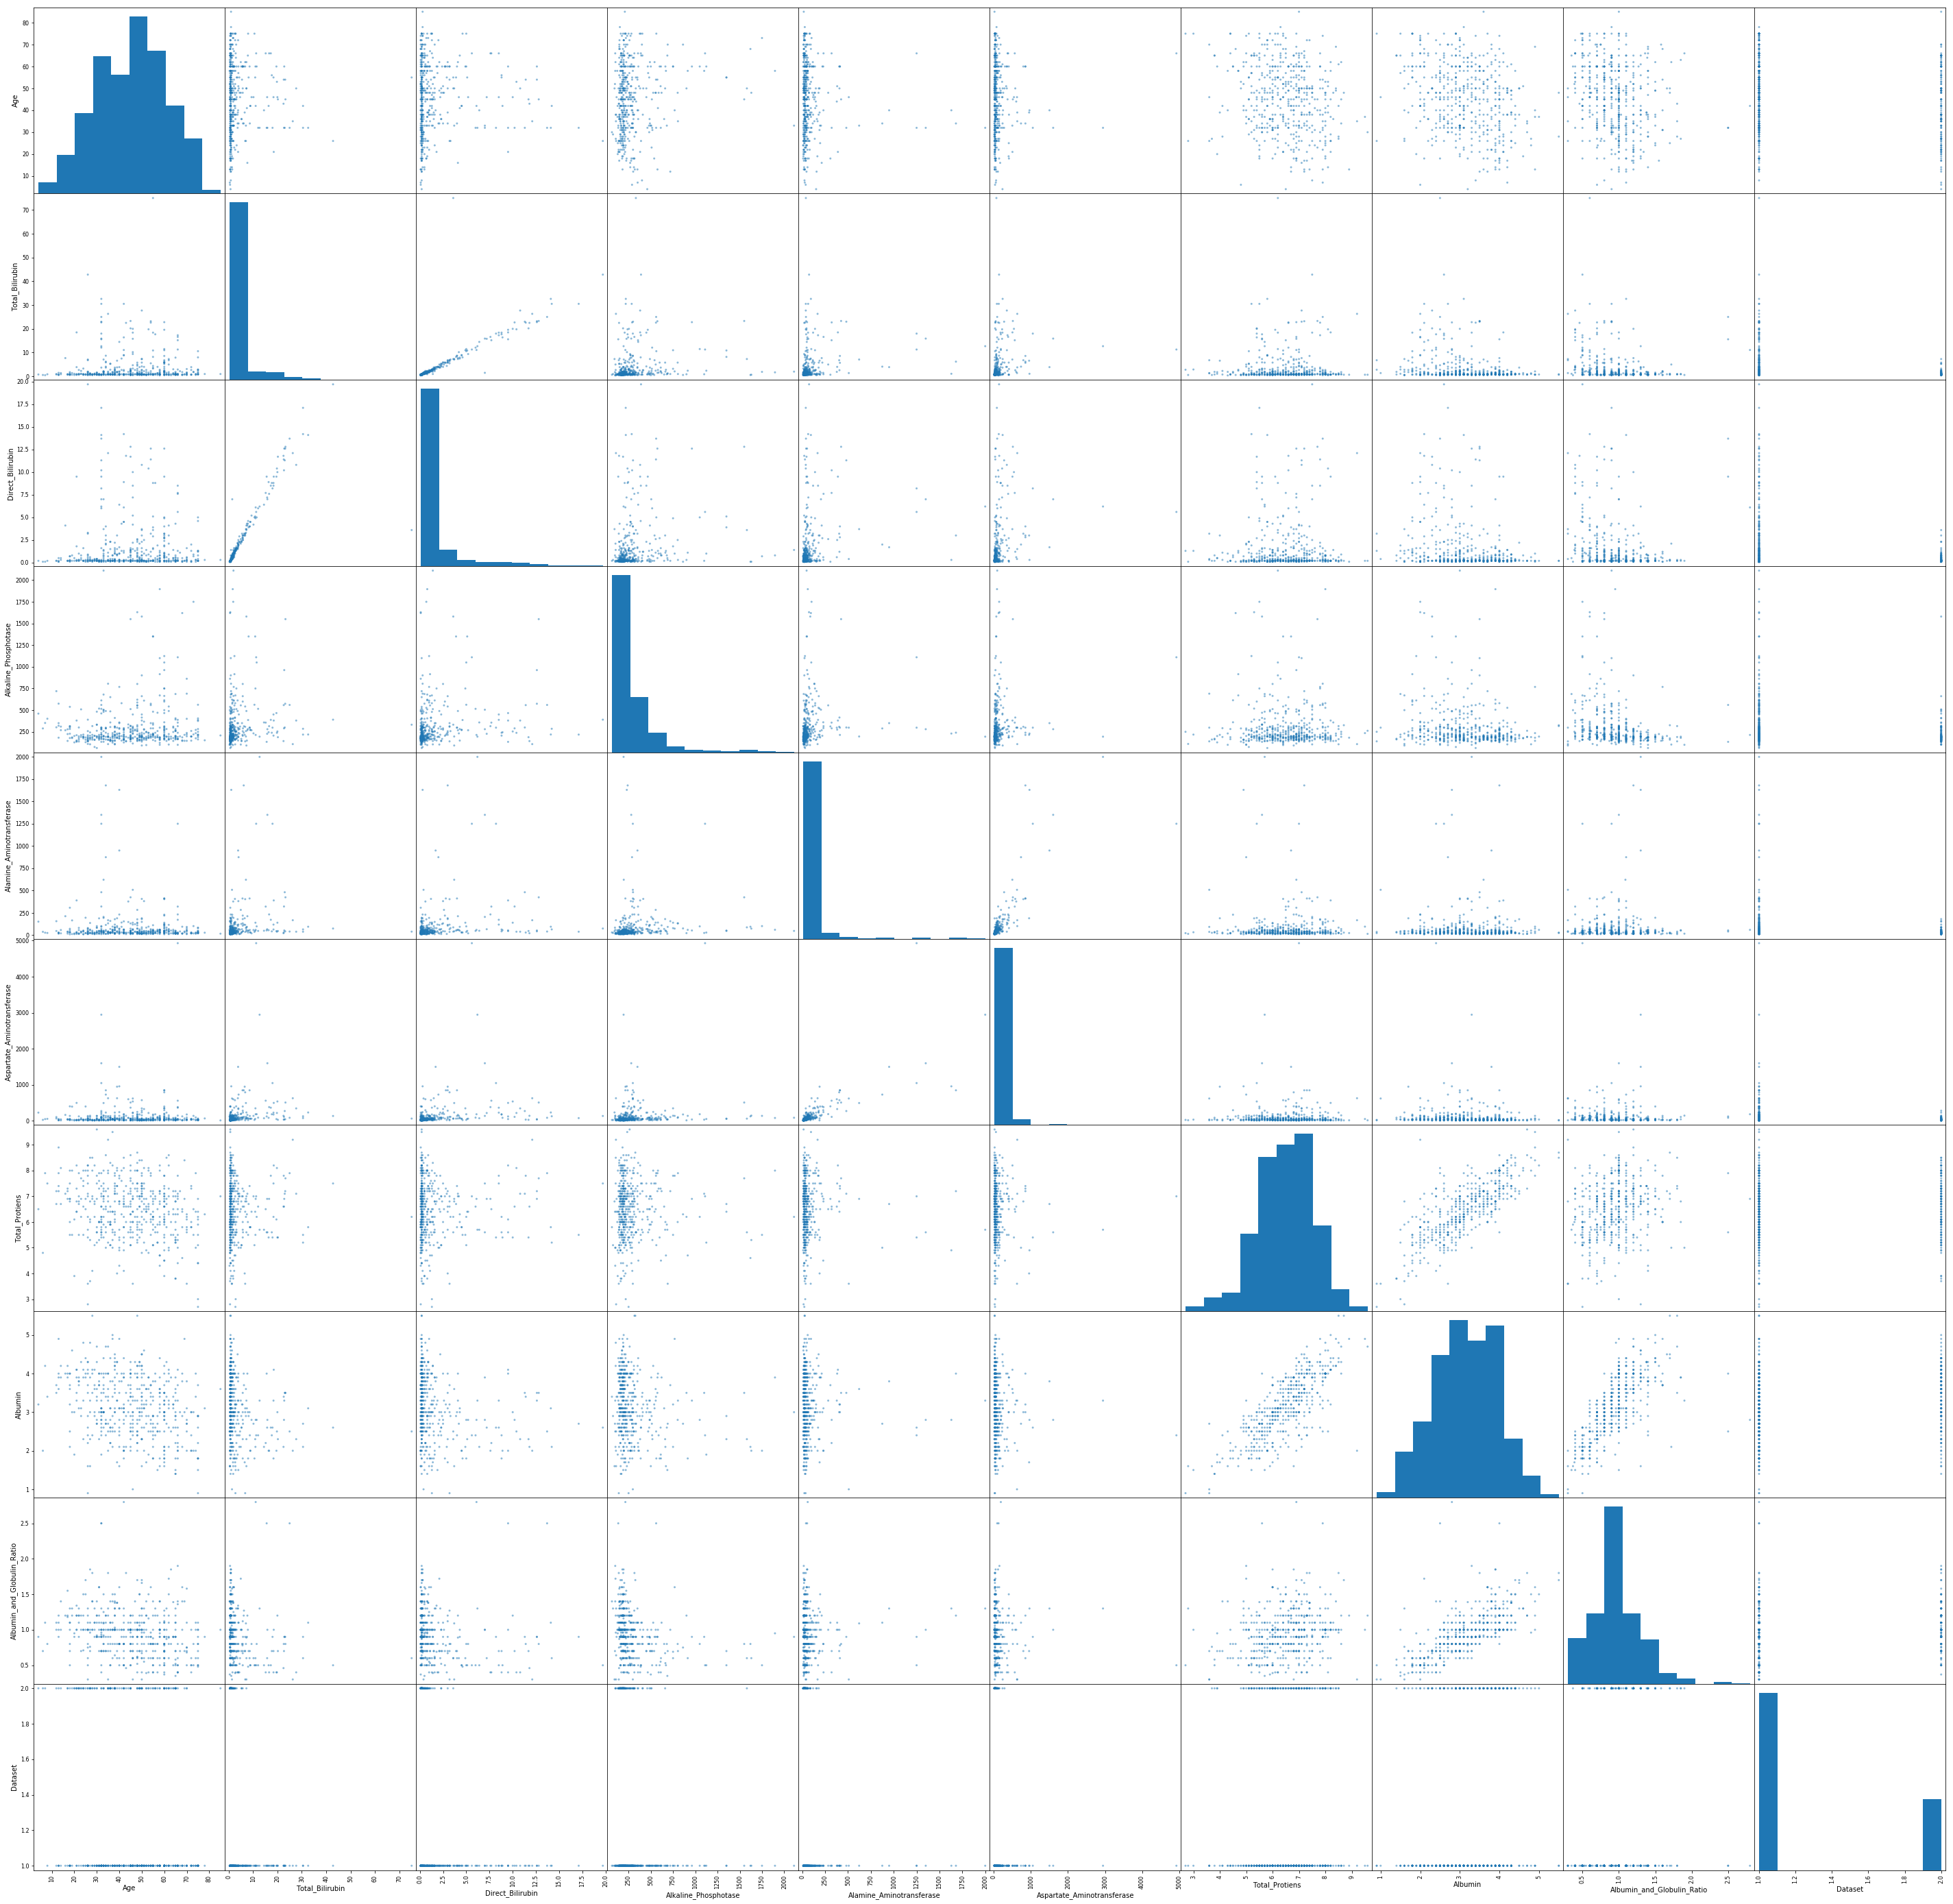

In [78]:
# scatter plot matrix
scatter_matrix(data,figsize=(50,50))
plt.show()



## Droping the comlums, 
those have highly correlated with others, and one of them is dropped

In [ ]:
we observe that the healthy patients have higher frequency of small values in narrow ranges for total bilirubin, 
direct bilirubin, aspertate aminotransferace and alkaline phosphotase 
compared to unhealthy patients.

### CORRELATION ANAYSIS (to verify above relationship)

In [81]:
import seaborn as sns

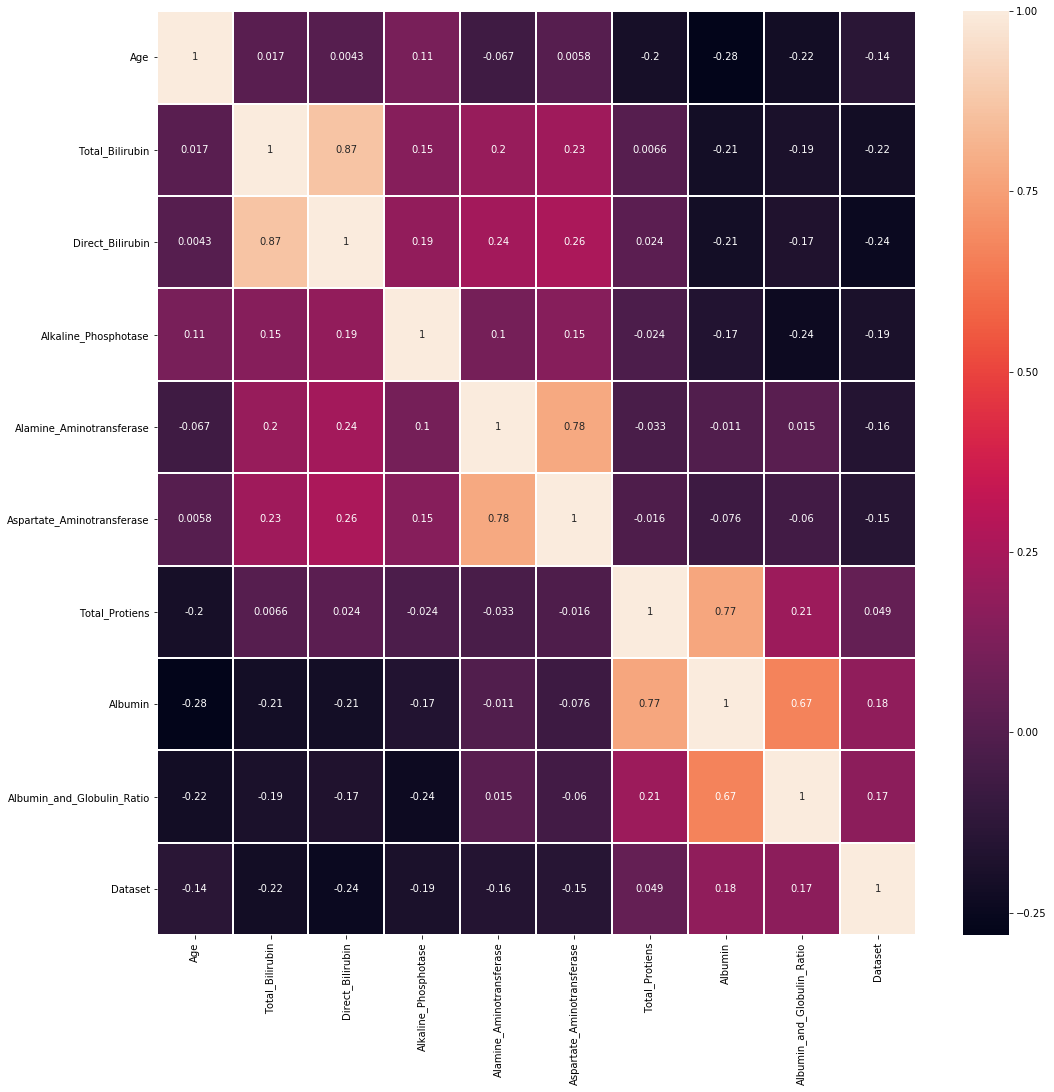

In [82]:
num_cols = data._get_numeric_data().columns
cor = data[num_cols].corr()

threshold = 0.7

corlist = []

for i in range(0,len(num_cols)):
    for j in range(i+1,len(num_cols)):
        if (j != i and cor.iloc[i,j] <= 1 ) or (j != i and cor.iloc[i,j] >= -1):
            corlist.append([cor.iloc[i,j],i,j]) 

#Sort higher correlations first            
sort_corlist = sorted(corlist,key=lambda x: -abs(x[0]))
fig, ax = plt.subplots(figsize=(17,17))

corr_mat=data.corr()
sns.heatmap(corr_mat,annot=True,linewidths=1, ax=ax)

## Dropping

In [58]:
#data.drop(['Aspartate_Aminotransferase','Albumin'],axis=1,inplace=True)

## Visualizing  People With Dataset=1/2

Number of patients diagnosed with liver disease:  333
Number of patients not diagnosed with liver disease:  133


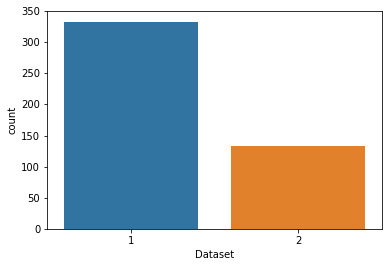

In [83]:
sns.countplot(data=data, x = 'Dataset', label='Count')

LD, NLD =data['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

# Dividing data into test and train and seprating the Feature and response

In [84]:

X = data.drop(['Dataset'], axis=1)
y = data.Dataset


In [85]:
#array = data.values
#X = array[:,0:9]
#y = array[:,10]
#X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=1) 
X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27
1,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.00
2,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40
3,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70
4,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00


In [86]:
data.isnull().values.any()

False

#### Encoding Male and female using one-hot encoder  col-1 Gender

In [87]:
# Encoding categorical data
# Encoding the Independent Variable
Gender = pd.get_dummies(X['Gender'], prefix = 'Gender', drop_first=True)
X.drop('Gender',axis=1,inplace=True)
X = pd.concat([X,Gender],axis=1)

In [88]:
X.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Male
0,60,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,0.8,0.2,158,21,16,6.0,3.0,1.00,0
2,60,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,0.9,0.2,154,16,12,7.0,3.5,1.00,0


In [64]:
X.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Total_Protiens',
       'Albumin_and_Globulin_Ratio', 'Gender_Male'],
      dtype='object')

### Splitting

In [89]:
validation_size = 0.20  # 80-20
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=validation_size, random_state=1)

In [ ]:
#for accuracy of train data : 10-fold cross validation

### Build Models


In [90]:
 

# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RFC',RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.687482 (0.075205)
LDA: 0.689972 (0.095850)
KNN: 0.626458 (0.059825)
CART: 0.634282 (0.053653)
NB: 0.570413 (0.072532)
SVM: 0.698364 (0.072697)


C:\Program Files\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Program Files\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Program Files\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Program Files\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Program Files\anaconda\lib\site-packages\sklearn\ensemble\forest.py:2

RFC: 0.671622 (0.058202)


C:\Program Files\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Select Best Model
#### therefore from trained data : 

### plot of the model evaluation results

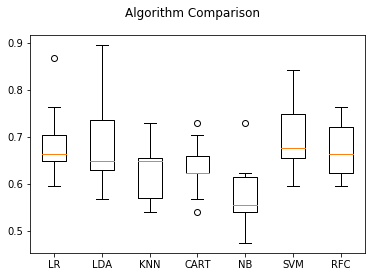

In [93]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [ ]:
#LR SVM

In [ ]:
it looks like SVM :   has the largest estimated accuracy score.
It has the most highest mean accuracy value

Therefore:
   SVM >logistic>  RFC> decision tree,KNN..............>NB

In [ ]:
The RandomForest algorithm  was an accurate model based on our train data.
Now we want to get an idea of the accuracy of the model on our test set.

In [ ]:

# Make predictions on test dataset


### RANDOM FOREST

In [110]:
model= RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7127659574468085


C:\Program Files\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [95]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[63 11]
 [14  6]]
              precision    recall  f1-score   support

           1       0.82      0.85      0.83        74
           2       0.35      0.30      0.32        20

   micro avg       0.73      0.73      0.73        94
   macro avg       0.59      0.58      0.58        94
weighted avg       0.72      0.73      0.73        94



In [ ]:
The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
The recall is intuitively the ability of the classifier to find all the positive samples.

## KNN 

In [106]:

model=KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.723404255319149
[[60 14]
 [12  8]]
              precision    recall  f1-score   support

           1       0.83      0.81      0.82        74
           2       0.36      0.40      0.38        20

   micro avg       0.72      0.72      0.72        94
   macro avg       0.60      0.61      0.60        94
weighted avg       0.73      0.72      0.73        94



## Logistic 

In [102]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7659574468085106
[[68  6]
 [16  4]]
              precision    recall  f1-score   support

           1       0.81      0.92      0.86        74
           2       0.40      0.20      0.27        20

   micro avg       0.77      0.77      0.77        94
   macro avg       0.60      0.56      0.56        94
weighted avg       0.72      0.77      0.73        94



C:\Program Files\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## SVM

In [98]:
clf = SVC(kernel='linear')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7872340425531915
[[74  0]
 [20  0]]
              precision    recall  f1-score   support

           1       0.79      1.00      0.88        74
           2       0.00      0.00      0.00        20

   micro avg       0.79      0.79      0.79        94
   macro avg       0.39      0.50      0.44        94
weighted avg       0.62      0.79      0.69        94



C:\Program Files\anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Program Files\anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Program Files\anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
#have deleted few columns, but nothing improved
#hence now choose the best out of given

In [111]:
compare = pd.DataFrame({'Prediction': y_pred, 'Test Data' : y_test})
compare.head(10)


,Prediction,Test Data
290,1,1
436,1,1
287,1,1
232,1,1
67,1,1
238,1,1
62,1,2
246,2,2
223,1,1
370,1,1


In [112]:
actual_y_test = y_test
actual_predicted = y_pred
diff = abs(actual_y_test - actual_predicted)
compare_actual = pd.DataFrame({'Test Data': actual_y_test, 'Predicted Price' : actual_predicted, 'Difference' : diff})
compare_actual = compare_actual.astype(int)
compare_actual.head(10)

,Test Data,Predicted Price,Difference
290,1,1,0
436,1,1,0
287,1,1,0
232,1,1,0
67,1,1,0
238,1,1,0
62,2,1,1
246,2,2,0
223,1,1,0
370,1,1,0


In [113]:
(actual_y_test==actual_predicted).value_counts()

True     67
False    27
Name: Dataset, dtype: int64

## From observing top 3 models on test and predicted Data 

true:82   false:35  random
true:83 false 34      svm
true:85 false:32   logistic   
        knn(discarded)

In [ ]:
svm  True     74  False    20
logistic True     72 False    22
knn  True 68 False    26
random  True     67  False    27

### Hence, we can either choose SVM or logistic

In [115]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.00, random_state=1)

In [117]:
X_train.shape

(466, 10)

In [118]:
X.shape

# taking all my train data as X(train.csv)

(466, 10)

In [119]:
X_given_test=pd.read_csv("test.csv")

In [120]:
X_given_test.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,46,Male,0.8,0.2,160,31,40,7.3,3.8,1.10
1,15,Male,0.8,0.2,380,25,66,6.1,3.7,1.50
2,66,Female,4.2,2.1,159,15,30,7.1,2.2,0.40
3,32,Male,0.6,0.1,237,45,31,7.5,4.3,1.34
4,60,Male,2.6,1.2,171,42,37,5.4,2.7,1.00


# Filtering Given test data

In [121]:
X_given_test['Albumin_and_Globulin_Ratio'].fillna(X_given_test['Albumin_and_Globulin_Ratio'].median(), inplace=True)
X_given_test.isnull().sum()
# Encoding categorical data
# Encoding the Independent Variable
Gender= pd.get_dummies(X_given_test['Gender'], prefix = 'Gender', drop_first=True)
X_given_test.drop('Gender',axis=1,inplace=True)
X_given_test = pd.concat([X_given_test,Gender],axis=1)


In [122]:
X_given_test.shape

(117, 10)

In [123]:
X_train.shape

(466, 10)

Hence, columns are same , We can predict using y_pred

### Applying Logistic

In [136]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X_given_test)


C:\Program Files\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [137]:
y_pred

array([1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [138]:
dataset = pd.DataFrame({'Dataset':y_pred})
print(dataset)

     Dataset
0          1
1          2
2          1
3          2
4          1
5          1
6          1
7          1
8          1
9          1
10         1
11         2
12         1
13         2
14         1
15         1
16         1
17         2
18         1
19         1
20         1
21         1
22         1
23         2
24         1
25         1
26         1
27         1
28         1
29         1
..       ...
87         1
88         1
89         1
90         2
91         1
92         1
93         1
94         1
95         1
96         1
97         1
98         1
99         1
100        1
101        1
102        1
103        1
104        1
105        1
106        1
107        1
108        1
109        1
110        1
111        1
112        1
113        1
114        1
115        1
116        1

[117 rows x 1 columns]


In [141]:
dataset.groupby('Dataset').count()

""
Dataset
1
2


In [142]:
dataset.to_csv("solution_problem1.csv",index=False)